In [ ]:
!gdown --id 1Di6T5CCjdrG_MoSUATjYhh5lMJwrbO9O

/usr/local/lib/python3.11/dist-packages/gdown/__main__.py:140: FutureWarning: Option `--id` was deprecated in version 4.3.1 and will be removed in 5.0. You don't need to pass it anymore to use a file ID.
  warnings.warn(
Downloading...
From (original): https://drive.google.com/uc?id=1Di6T5CCjdrG_MoSUATjYhh5lMJwrbO9O
From (redirected): https://drive.google.com/uc?id=1Di6T5CCjdrG_MoSUATjYhh5lMJwrbO9O&confirm=t&uuid=62cd126c-18ba-41b5-89c1-5f8f0bb81428
To: /content/archive.zip
100% 685M/685M [00:09<00:00, 75.8MB/s]


In [ ]:
!unzip /content/archive.zip

Archive:  /content/archive.zip
  inflating: US_Accidents_March23.csv  


In [ ]:
from google.colab import files, drive
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt

pd.set_option('display.max_columns', None)

# Data Exploration

In [ ]:
df = pd.read_csv("/content/US_Accidents_March23.csv")

In [ ]:
df.head()

,ID,Source,Severity,Start_Time,End_Time,Start_Lat,Start_Lng,End_Lat,End_Lng,Distance(mi),Description,Street,City,County,State,Zipcode,Country,Timezone,Airport_Code,Weather_Timestamp,Temperature(F),Wind_Chill(F),Humidity(%),Pressure(in),Visibility(mi),Wind_Direction,Wind_Speed(mph),Precipitation(in),Weather_Condition,Amenity,Bump,Crossing,Give_Way,Junction,No_Exit,Railway,Roundabout,Station,Stop,Traffic_Calming,Traffic_Signal,Turning_Loop,Sunrise_Sunset,Civil_Twilight,Nautical_Twilight,Astronomical_Twilight
0,A-1,Source2,3,2016-02-08 05:46:00,2016-02-08 11:00:00,39.865147,-84.058723,NaN,NaN,0.01,Right lane blocked due to accident on I-70 Eas...,I-70 E,Dayton,Montgomery,OH,45424,US,US/Eastern,KFFO,2016-02-08 05:58:00,36.9,NaN,91.0,29.68,10.0,Calm,NaN,0.02,Light Rain,False,False,False,False,False,False,False,False,False,False,False,False,False,Night,Night,Night,Night
1,A-2,Source2,2,2016-02-08 06:07:59,2016-02-08 06:37:59,39.928059,-82.831184,NaN,NaN,0.01,Accident on Brice Rd at Tussing Rd. Expect del...,Brice Rd,Reynoldsburg,Franklin,OH,43068-3402,US,US/Eastern,KCMH,2016-02-08 05:51:00,37.9,NaN,100.0,29.65,10.0,Calm,NaN,0.00,Light Rain,False,False,False,False,False,False,False,False,False,False,False,False,False,Night,Night,Night,Day
2,A-3,Source2,2,2016-02-08 06:49:27,2016-02-08 07:19:27,39.063148,-84.032608,NaN,NaN,0.01,Accident on OH-32 State Route 32 Westbound at ...,State Route 32,Williamsburg,Clermont,OH,45176,US,US/Eastern,KI69,2016-02-08 06:56:00,36.0,33.3,100.0,29.67,10.0,SW,3.5,NaN,Overcast,False,False,False,False,False,False,False,False,False,False,False,True,False,Night,Night,Day,Day
3,A-4,Source2,3,2016-02-08 07:23:34,2016-02-08 07:53:34,39.747753,-84.205582,NaN,NaN,0.01,Accident on I-75 Southbound at Exits 52 52B US...,I-75 S,Dayton,Montgomery,OH,45417,US,US/Eastern,KDAY,2016-02-08 07:38:00,35.1,31.0,96.0,29.64,9.0,SW,4.6,NaN,Mostly Cloudy,False,False,False,False,False,False,False,False,False,False,False,False,False,Night,Day,Day,Day
4,A-5,Source2,2,2016-02-08 07:39:07,2016-02-08 08:09:07,39.627781,-84.188354,NaN,NaN,0.01,Accident on McEwen Rd at OH-725 Miamisburg Cen...,Miamisburg Centerville Rd,Dayton,Montgomery,OH,45459,US,US/Eastern,KMGY,2016-02-08 07:53:00,36.0,33.3,89.0,29.65,6.0,SW,3.5,NaN,Mostly Cloudy,False,False,False,False,False,False,False,False,False,False,False,True,False,Day,Day,Day,Day


In [ ]:
df.shape

(7728394, 46)

In [ ]:
df.describe()

,Severity,Start_Lat,Start_Lng,End_Lat,End_Lng,Distance(mi),Temperature(F),Wind_Chill(F),Humidity(%),Pressure(in),Visibility(mi),Wind_Speed(mph),Precipitation(in)
count,7.728394e+06,7.728394e+06,7.728394e+06,4.325632e+06,4.325632e+06,7.728394e+06,7.564541e+06,5.729375e+06,7.554250e+06,7.587715e+06,7.551296e+06,7.157161e+06,5.524808e+06
mean,2.212384e+00,3.620119e+01,-9.470255e+01,3.626183e+01,-9.572557e+01,5.618423e-01,6.166329e+01,5.825105e+01,6.483104e+01,2.953899e+01,9.090376e+00,7.685490e+00,8.407210e-03
std,4.875313e-01,5.076079e+00,1.739176e+01,5.272905e+00,1.810793e+01,1.776811e+00,1.901365e+01,2.238983e+01,2.282097e+01,1.006190e+00,2.688316e+00,5.424983e+00,1.102246e-01
min,1.000000e+00,2.455480e+01,-1.246238e+02,2.456601e+01,-1.245457e+02,0.000000e+00,-8.900000e+01,-8.900000e+01,1.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
25%,2.000000e+00,3.339963e+01,-1.172194e+02,3.346207e+01,-1.177543e+02,0.000000e+00,4.900000e+01,4.300000e+01,4.800000e+01,2.937000e+01,1.000000e+01,4.600000e+00,0.000000e+00
50%,2.000000e+00,3.582397e+01,-8.776662e+01,3.618349e+01,-8.802789e+01,3.000000e-02,6.400000e+01,6.200000e+01,6.700000e+01,2.986000e+01,1.000000e+01,7.000000e+00,0.000000e+00
75%,2.000000e+00,4.008496e+01,-8.035368e+01,4.017892e+01,-8.024709e+01,4.640000e-01,7.600000e+01,7.500000e+01,8.400000e+01,3.003000e+01,1.000000e+01,1.040000e+01,0.000000e+00
max,4.000000e+00,4.900220e+01,-6.711317e+01,4.907500e+01,-6.710924e+01,4.417500e+02,2.070000e+02,2.070000e+02,1.000000e+02,5.863000e+01,1.400000e+02,1.087000e+03,3.647000e+01


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7728394 entries, 0 to 7728393
Data columns (total 46 columns):
 #   Column                 Dtype  
---  ------                 -----  
 0   ID                     object 
 1   Source                 object 
 2   Severity               int64  
 3   Start_Time             object 
 4   End_Time               object 
 5   Start_Lat              float64
 6   Start_Lng              float64
 7   End_Lat                float64
 8   End_Lng                float64
 9   Distance(mi)           float64
 10  Description            object 
 11  Street                 object 
 12  City                   object 
 13  County                 object 
 14  State                  object 
 15  Zipcode                object 
 16  Country                object 
 17  Timezone               object 
 18  Airport_Code           object 
 19  Weather_Timestamp      object 
 20  Temperature(F)         float64
 21  Wind_Chill(F)          float64
 22  Humidity(%)       

In [ ]:
df.isnull().sum()

,0
ID,0
Source,0
Severity,0
Start_Time,0
End_Time,0
Start_Lat,0
Start_Lng,0
End_Lat,3402762
End_Lng,3402762
Distance(mi),0


In [ ]:
df['Wind_Direction'].value_counts()

,count
Wind_Direction,
CALM,961624
S,419989
SSW,384840
W,383913
WNW,378781
NW,369352
Calm,368557
SW,364470
WSW,353806


# Data preprocessing

In [ ]:
# ID will not serve any benefit in our case
df = df.drop(columns=['ID'])

# Country only has one value, which is US
df = df.drop(columns=['Country'])

In [ ]:
# convert to datetime
df['Start_Time'] = pd.to_datetime(df['Start_Time'], format='mixed')
df['End_Time'] = pd.to_datetime(df['End_Time'], format='mixed')
df['Weather_Timestamp'] = pd.to_datetime(df['Weather_Timestamp'])

In [ ]:
# adding time data
df['Hour'] = df['Start_Time'].dt.hour
df['Day'] = df['Start_Time'].dt.day
df['Month'] = df['Start_Time'].dt.month
df['Year'] = df['Start_Time'].dt.year
df['Weekday'] = df['Start_Time'].dt.day_name()

In [ ]:
# standardizing
df['Wind_Direction'] = df['Wind_Direction'].replace({
    'South': 'S',
    'North': 'N',
    'West': 'W',
    'East': 'E',
    'Calm': 'CALM',
    'Variable': 'VAR'
})

In [ ]:
df['Wind_Direction'].value_counts()

,count
Wind_Direction,
CALM,1330181
S,597364
W,548664
N,460536
SSW,384840
E,382459
WNW,378781
NW,369352
VAR,364562


# Data visualization

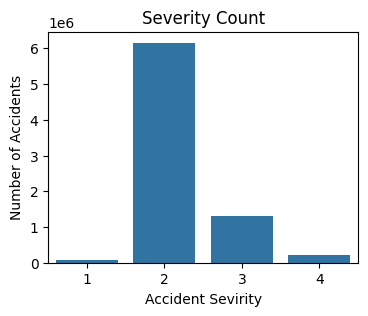

In [ ]:
plt.figure(figsize=(4,3))
sns.countplot(x='Severity', data=df)
plt.title('Severity Count')
plt.xlabel('Accident Sevirity')
plt.ylabel('Number of Accidents')
plt.show()

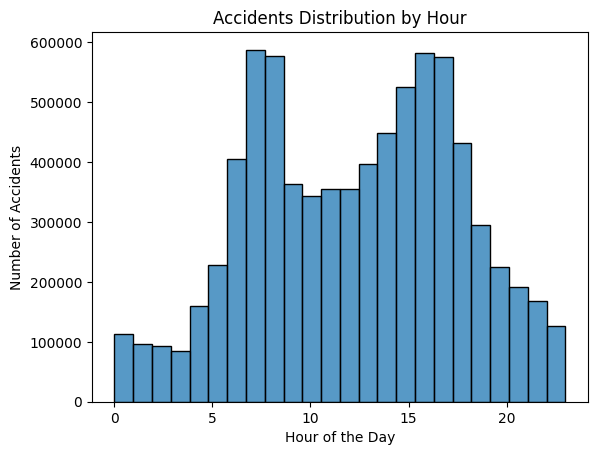

In [ ]:
sns.histplot(df['Hour'], bins=24, kde=False)
plt.title('Accidents Distribution by Hour')
plt.xlabel('Hour of the Day')
plt.ylabel('Number of Accidents')
plt.show()

<Axes: title={'center': 'Top 10 States with Most Accidents'}, xlabel='State'>

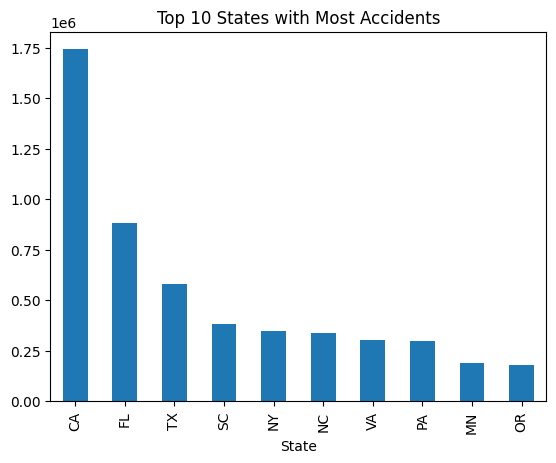

In [ ]:
top_states = df['State'].value_counts().head(10)
top_states.plot(kind='bar', title='Top 10 States with Most Accidents')

<Axes: xlabel='Start_Lng', ylabel='Start_Lat'>

/usr/local/lib/python3.11/dist-packages/IPython/core/events.py:89: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  func(*args, **kwargs)
/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  fig.canvas.print_figure(bytes_io, **kw)


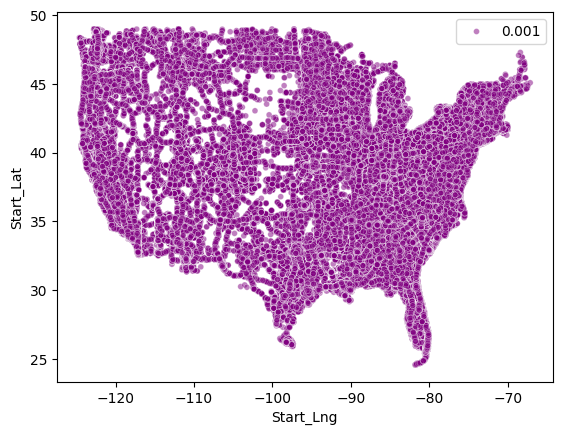

In [ ]:
sns.scatterplot( x = df.Start_Lng,
                y = df.Start_Lat, size = 0.001,
                 alpha = 0.5,
                 color= 'purple')

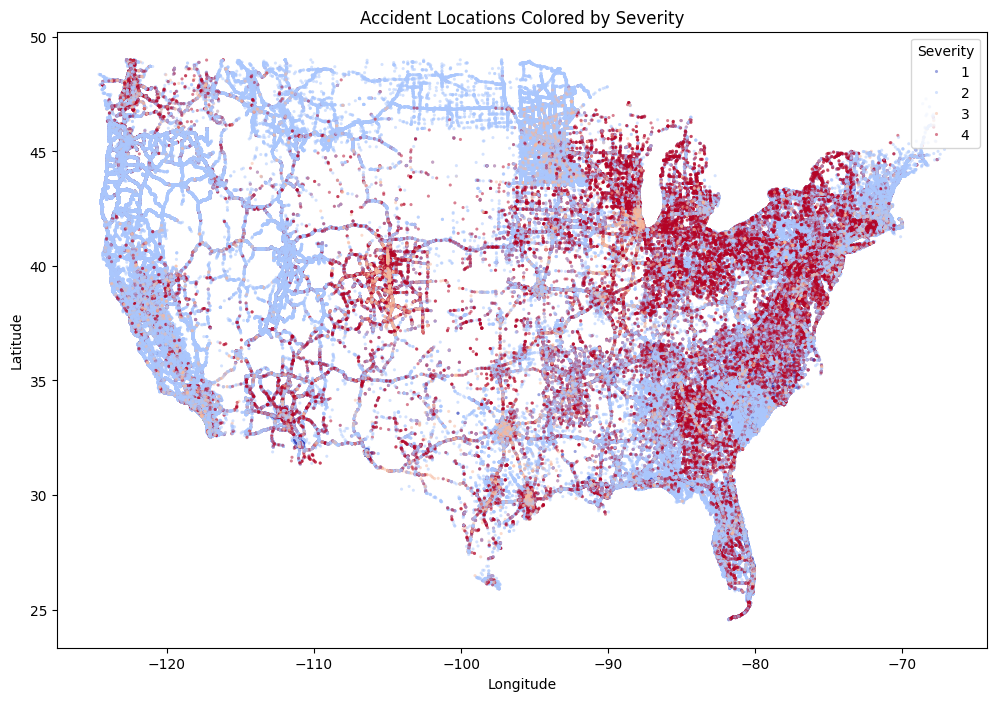

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 8))  # Make the image bigger

sns.scatterplot(
    x=df.Start_Lng,
    y=df.Start_Lat,
    hue=df.Severity,         # Set color by severity
    alpha=0.5,
    palette='coolwarm',       # or 'coolwarm', 'Set1', etc. viridis
    linewidth=0,
    s=5                      # Slightly bigger points (adjust as needed)
)

plt.legend(title="Severity", loc="upper right")
plt.title("Accident Locations Colored by Severity")
plt.xlabel("Longitude")
plt.ylabel("Latitude")
plt.show()


# Feature engineering

From latitudes and longitues we will calculate the distance of the accident.

In [ ]:
# Fonction Haversine
def haversine(lat1, lon1, lat2, lon2):
    R = 6371  # Rayon de la Terre en km
    lat1, lon1, lat2, lon2 = map(np.radians, [lat1, lon1, lat2, lon2])
    dlat = lat2 - lat1
    dlon = lon2 - lon1

    a = np.sin(dlat/2)**2 + np.cos(lat1) * np.cos(lat2) * np.sin(dlon/2)**2
    c = 2 * np.arcsin(np.sqrt(a))
    return R * c

# Ajout de la colonne "Distance" au DataFrame
df['Collision_Distance'] = haversine(df['Start_Lat'], df['Start_Lng'], df['End_Lat'], df['End_Lng'])

In [ ]:
print(df.isna().sum())

Source                         0
Severity                       0
Start_Time                     0
End_Time                       0
Start_Lat                      0
Start_Lng                      0
End_Lat                  3402762
End_Lng                  3402762
Distance(mi)                   0
Description                    5
Street                     10869
City                         253
County                         0
State                          0
Zipcode                     1915
Timezone                    7808
Airport_Code               22635
Weather_Timestamp         120228
Temperature(F)            163853
Wind_Chill(F)            1999019
Humidity(%)               174144
Pressure(in)              140679
Visibility(mi)            177098
Wind_Direction            175206
Wind_Speed(mph)           571233
Precipitation(in)        2203586
Weather_Condition         173459
Amenity                        0
Bump                           0
Crossing                       0
Give_Way  

In [ ]:
df['Collision_Distance'] = df['Collision_Distance'].fillna(0)

Calculating accident impact duration

In [ ]:
df['Duration_Minutes'] = (df['End_Time'] - df['Start_Time']).dt.total_seconds() / 60

# After calculating Duration we don't need End_Time
df = df.drop(columns=['End_Time'])

In [ ]:
print(df.isna().sum())

Source                         0
Severity                       0
Start_Time                     0
Start_Lat                      0
Start_Lng                      0
End_Lat                  3402762
End_Lng                  3402762
Distance(mi)                   0
Description                    5
Street                     10869
City                         253
County                         0
State                          0
Zipcode                     1915
Timezone                    7808
Airport_Code               22635
Weather_Timestamp         120228
Temperature(F)            163853
Wind_Chill(F)            1999019
Humidity(%)               174144
Pressure(in)              140679
Visibility(mi)            177098
Wind_Direction            175206
Wind_Speed(mph)           571233
Precipitation(in)        2203586
Weather_Condition         173459
Amenity                        0
Bump                           0
Crossing                       0
Give_Way                       0
Junction  

We calculate how much words the description has

In [ ]:
df['Desc_Word_Count'] = df['Description'].apply(lambda x: len(str(x).split()))

In [ ]:
!pip install textblob

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 624.3/624.3 kB 7.8 MB/s eta 0:00:00


In [ ]:
from textblob import TextBlob

# we need to fill the empty fields to be able to apply TextBlop
df['Description'] = df['Description'].fillna("NOT PROVIDED")

# description sentiment analysis using TextBlob
df['Desc_Sentiment'] = df['Description'].apply(lambda x: TextBlob(x).sentiment.polarity)

In [ ]:
# new boolean features based on the presence of certain keywords that often appear in accidents
keywords = ['accident', 'blocked', 'delay', 'construction', 'closed', 'fire', 'collision', 'overturned', 'disabled', 'lane', 'roadwork', 'debris']

for kw in keywords:
    df[f'has_{kw}'] = df['Description'].str.lower().str.contains(kw).astype(int)

# Cleaning

## Correlation

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7728394 entries, 0 to 7728393
Data columns (total 64 columns):
 #   Column                 Dtype         
---  ------                 -----         
 0   Source                 object        
 1   Severity               int64         
 2   Start_Time             datetime64[ns]
 3   Start_Lat              float64       
 4   Start_Lng              float64       
 5   End_Lat                float64       
 6   End_Lng                float64       
 7   Distance(mi)           float64       
 8   Description            object        
 9   Street                 object        
 10  City                   object        
 11  County                 object        
 12  State                  object        
 13  Zipcode                object        
 14  Timezone               object        
 15  Airport_Code           object        
 16  Weather_Timestamp      datetime64[ns]
 17  Temperature(F)         float64       
 18  Wind_Chill(F)         

**We will label encode all categorical columns to check their correlation**

In [ ]:
from sklearn.preprocessing import LabelEncoder

labels = ['Source', 'Street', 'City', 'County', 'State', 'Weekday', 'Weather_Condition', 'Wind_Direction', 'Sunrise_Sunset', 'Civil_Twilight', 'Nautical_Twilight', 'Astronomical_Twilight', 'Timezone', 'Airport_Code', 'Zipcode']
df_enc = df.drop(columns=["Description"]).copy()

# Label encode labels
le = LabelEncoder()
for label in labels:
    df_enc[label] = le.fit_transform(df[label])


In [ ]:
df_enc.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7728394 entries, 0 to 7728393
Data columns (total 63 columns):
 #   Column                 Dtype         
---  ------                 -----         
 0   Source                 int64         
 1   Severity               int64         
 2   Start_Time             datetime64[ns]
 3   Start_Lat              float64       
 4   Start_Lng              float64       
 5   End_Lat                float64       
 6   End_Lng                float64       
 7   Distance(mi)           float64       
 8   Street                 int64         
 9   City                   int64         
 10  County                 int64         
 11  State                  int64         
 12  Zipcode                int64         
 13  Timezone               int64         
 14  Airport_Code           int64         
 15  Weather_Timestamp      datetime64[ns]
 16  Temperature(F)         float64       
 17  Wind_Chill(F)          float64       
 18  Humidity(%)           

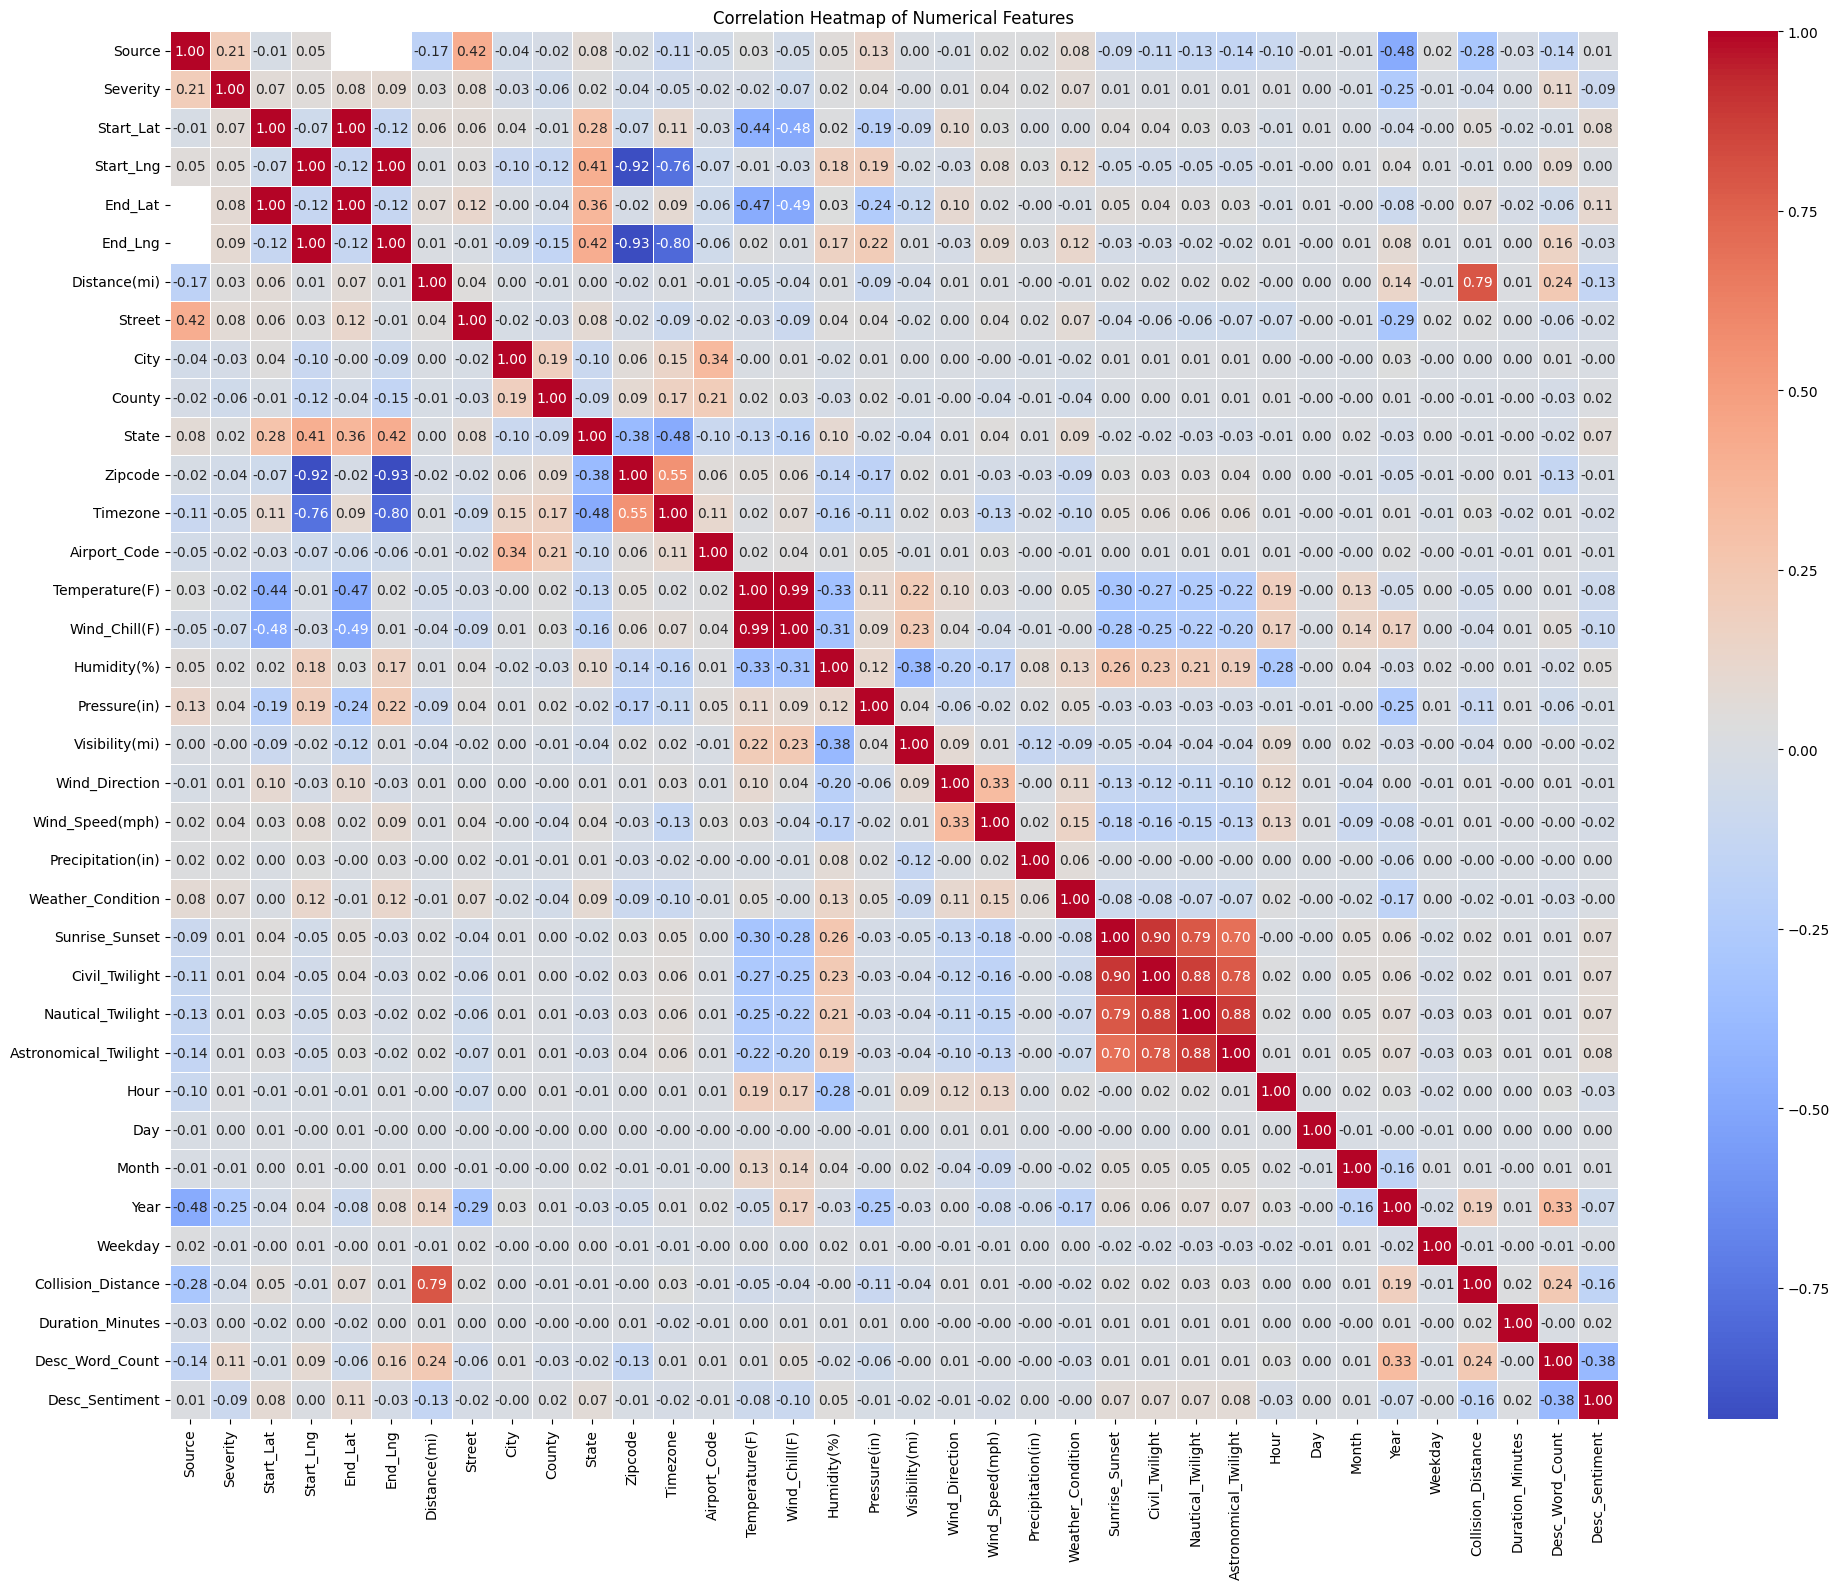

In [ ]:
numeric_df = df_enc.drop(columns=['has_accident', 'has_blocked', 'has_delay', 'has_construction', 'has_closed', 'has_fire', 'has_collision', 'has_overturned', 'has_disabled', 'has_lane', 'has_roadwork', 'has_debris']).select_dtypes(include=['float64', 'int64', 'int32'])
corr_matrix = numeric_df.corr()

plt.figure(figsize=(20, 16))
sns.heatmap(corr_matrix, annot=True, fmt=".2f", cmap='coolwarm', linewidths=0.5)
plt.title('Correlation Heatmap of Numerical Features')
plt.tight_layout()
plt.show()

In [ ]:
print(numeric_df.columns)

Index(['Source', 'Severity', 'Start_Lat', 'Start_Lng', 'End_Lat', 'End_Lng',
       'Distance(mi)', 'Street', 'City', 'County', 'State', 'Zipcode',
       'Timezone', 'Airport_Code', 'Temperature(F)', 'Wind_Chill(F)',
       'Humidity(%)', 'Pressure(in)', 'Visibility(mi)', 'Wind_Direction',
       'Wind_Speed(mph)', 'Precipitation(in)', 'Weather_Condition',
       'Sunrise_Sunset', 'Civil_Twilight', 'Nautical_Twilight',
       'Astronomical_Twilight', 'Hour', 'Day', 'Month', 'Year', 'Weekday',
       'Collision_Distance', 'Duration_Minutes', 'Desc_Word_Count',
       'Desc_Sentiment'],
      dtype='object')


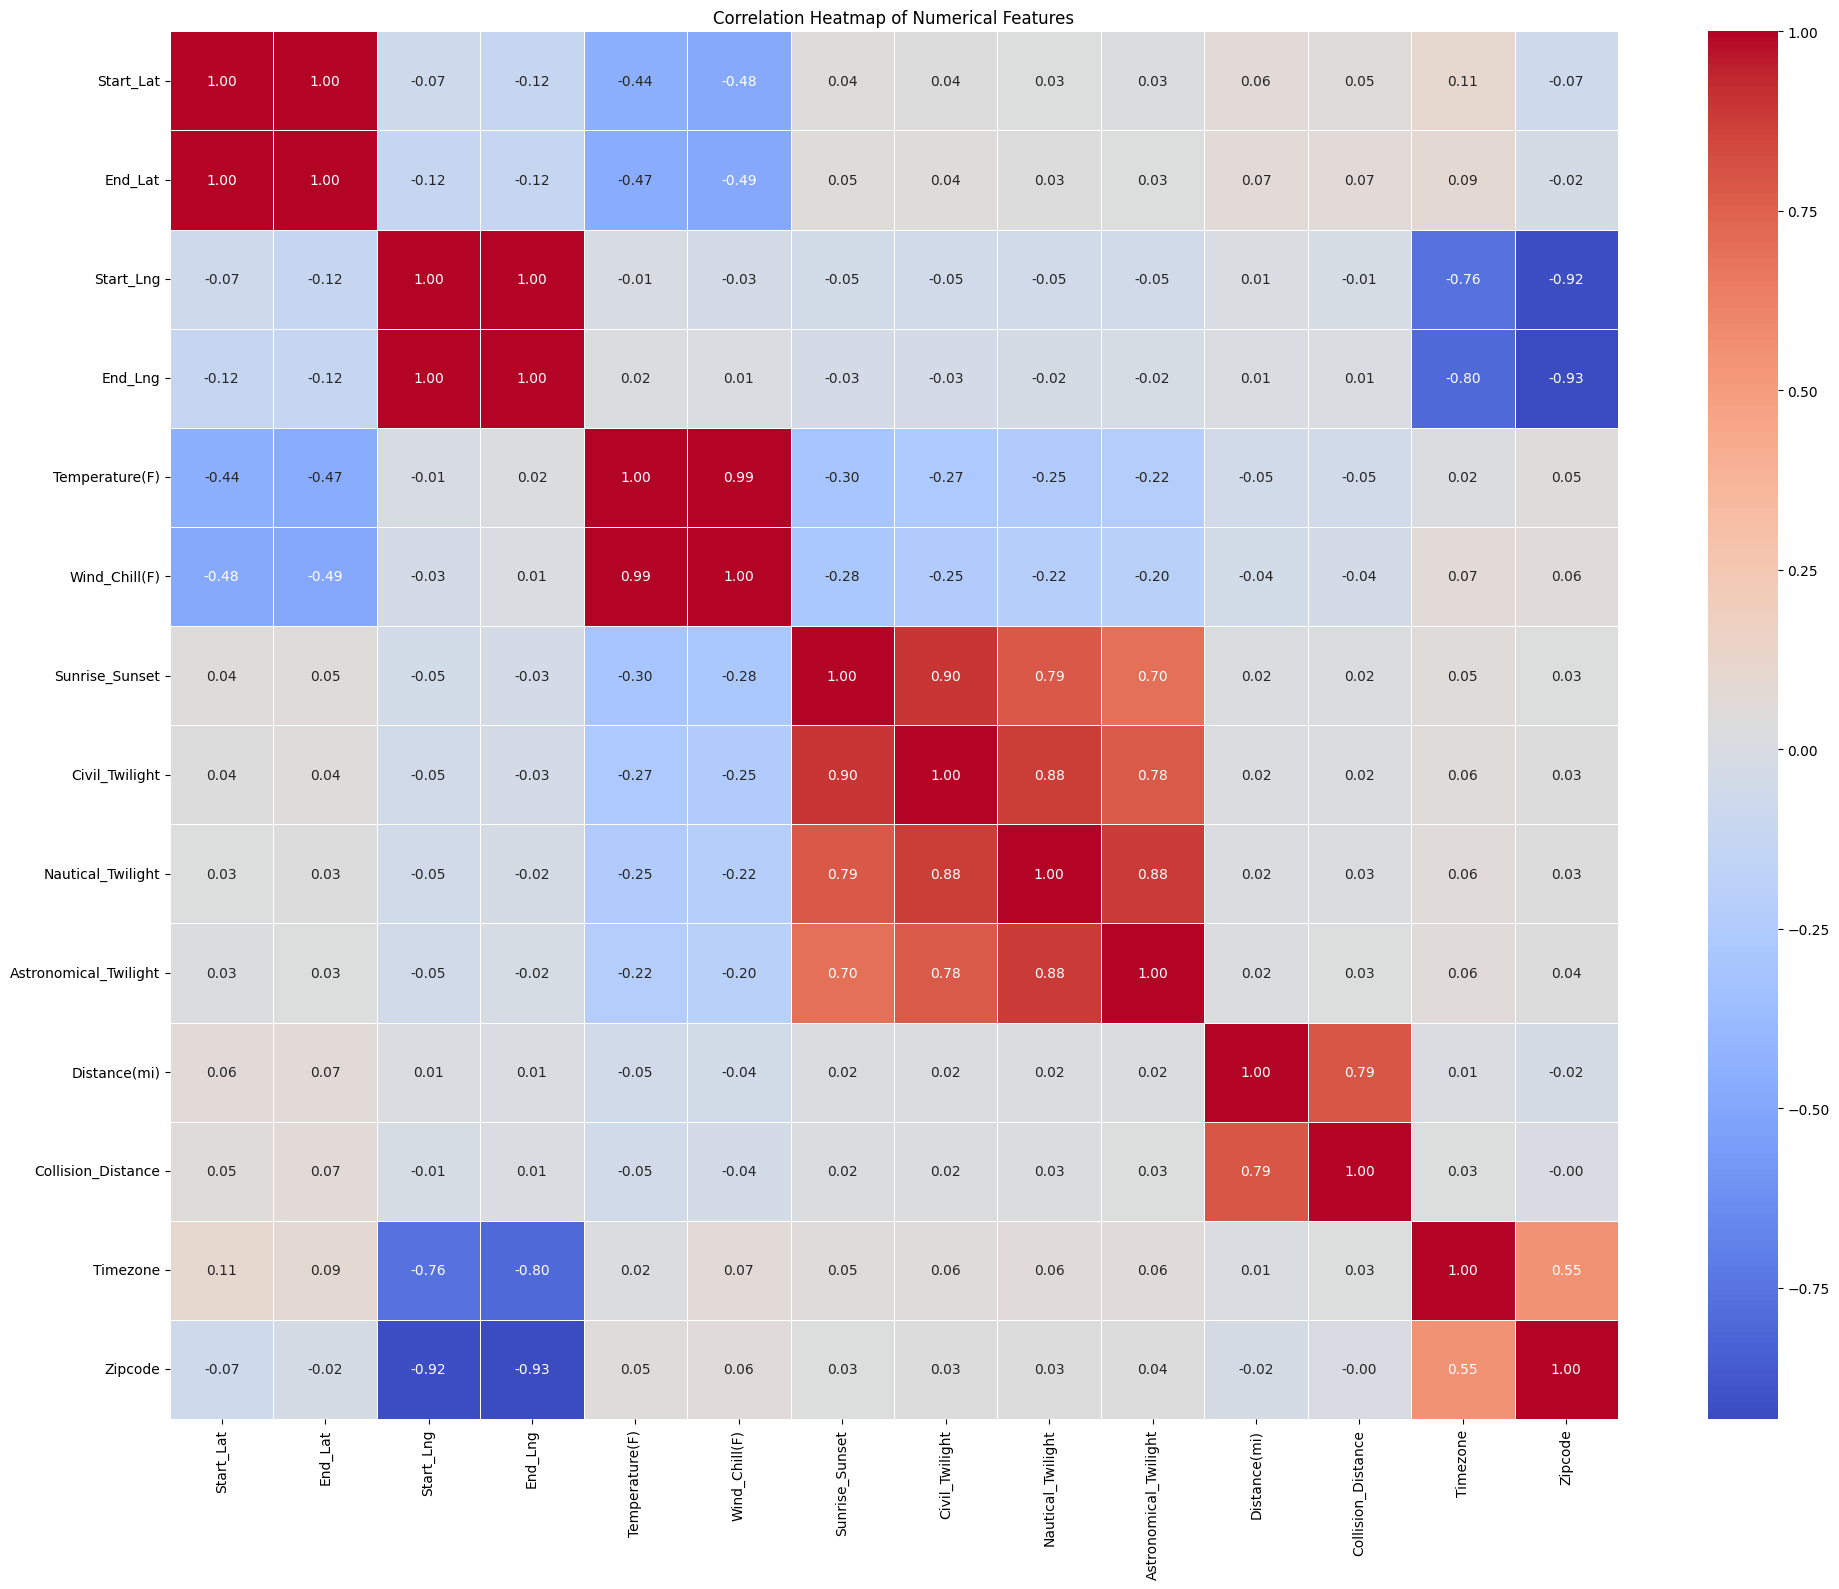

In [ ]:
corr_matrix = numeric_df[['Start_Lat', 'End_Lat', 'Start_Lng', 'End_Lng', 'Temperature(F)','Wind_Chill(F)', 'Sunrise_Sunset', 'Civil_Twilight', 'Nautical_Twilight', 'Astronomical_Twilight', 'Distance(mi)','Collision_Distance', 'Timezone', 'Zipcode']].corr()

plt.figure(figsize=(20, 16))
sns.heatmap(corr_matrix, annot=True, fmt=".2f", cmap='coolwarm', linewidths=0.5)
plt.title('Correlation Heatmap of Numerical Features')
plt.tight_layout()
plt.show()

In [ ]:
# We remove high correlated columns
df_dropped = df.drop(columns=['End_Lat', 'End_Lng', 'Wind_Chill(F)', 'Civil_Twilight', 'Nautical_Twilight', 'Astronomical_Twilight', 'Collision_Distance', 'Timezone', 'Zipcode'])
# We drop in df_enc to use it in Random Forest
df_enc = df_enc.drop(columns=['End_Lat', 'End_Lng', 'Wind_Chill(F)', 'Civil_Twilight', 'Nautical_Twilight', 'Astronomical_Twilight', 'Collision_Distance', 'Timezone', 'Zipcode'])

## Most important features

In [ ]:
df_cleaned = df_enc.drop(columns=['Start_Time','Weather_Timestamp']).dropna() # We can't use datetime values in Random Forest

X = df_cleaned.drop(columns=['Severity']) # Severity is the target
y = df_cleaned['Severity']

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y  # stratify if classification
)

In [ ]:
from sklearn.ensemble import RandomForestClassifier
from tqdm import tqdm

rf = RandomForestClassifier(n_estimators=10, random_state=42, verbose=1)
rf.fit(X_train, y_train)

[Parallel(n_jobs=1)]: Done  10 out of  10 | elapsed:  2.7min finished


RandomForestClassifier(n_estimators=10, random_state=42, verbose=1)

In [ ]:
# Get importances as a Pandas Series
importances = pd.Series(rf.feature_importances_, index=X.columns)

# Sort all features by importance
importances_sorted = importances.sort_values(ascending=False)

# Print or display them all
print(importances_sorted)


has_lane             0.100322
Street               0.091184
Source               0.068709
Distance(mi)         0.051579
Desc_Word_Count      0.048726
Start_Lng            0.048373
Duration_Minutes     0.045174
has_blocked          0.044634
Start_Lat            0.042722
Year                 0.042192
Desc_Sentiment       0.041155
has_closed           0.038577
has_accident         0.027535
Pressure(in)         0.025921
State                0.024737
County               0.023547
Month                0.023252
Temperature(F)       0.022938
City                 0.022166
Airport_Code         0.022163
Hour                 0.019544
Humidity(%)          0.018961
Day                  0.017389
Wind_Speed(mph)      0.014142
Wind_Direction       0.013508
Traffic_Signal       0.012025
Weekday              0.011018
Weather_Condition    0.010342
Visibility(mi)       0.005978
Crossing             0.005753
Precipitation(in)    0.004516
Sunrise_Sunset       0.003279
Junction             0.002725
Stop      

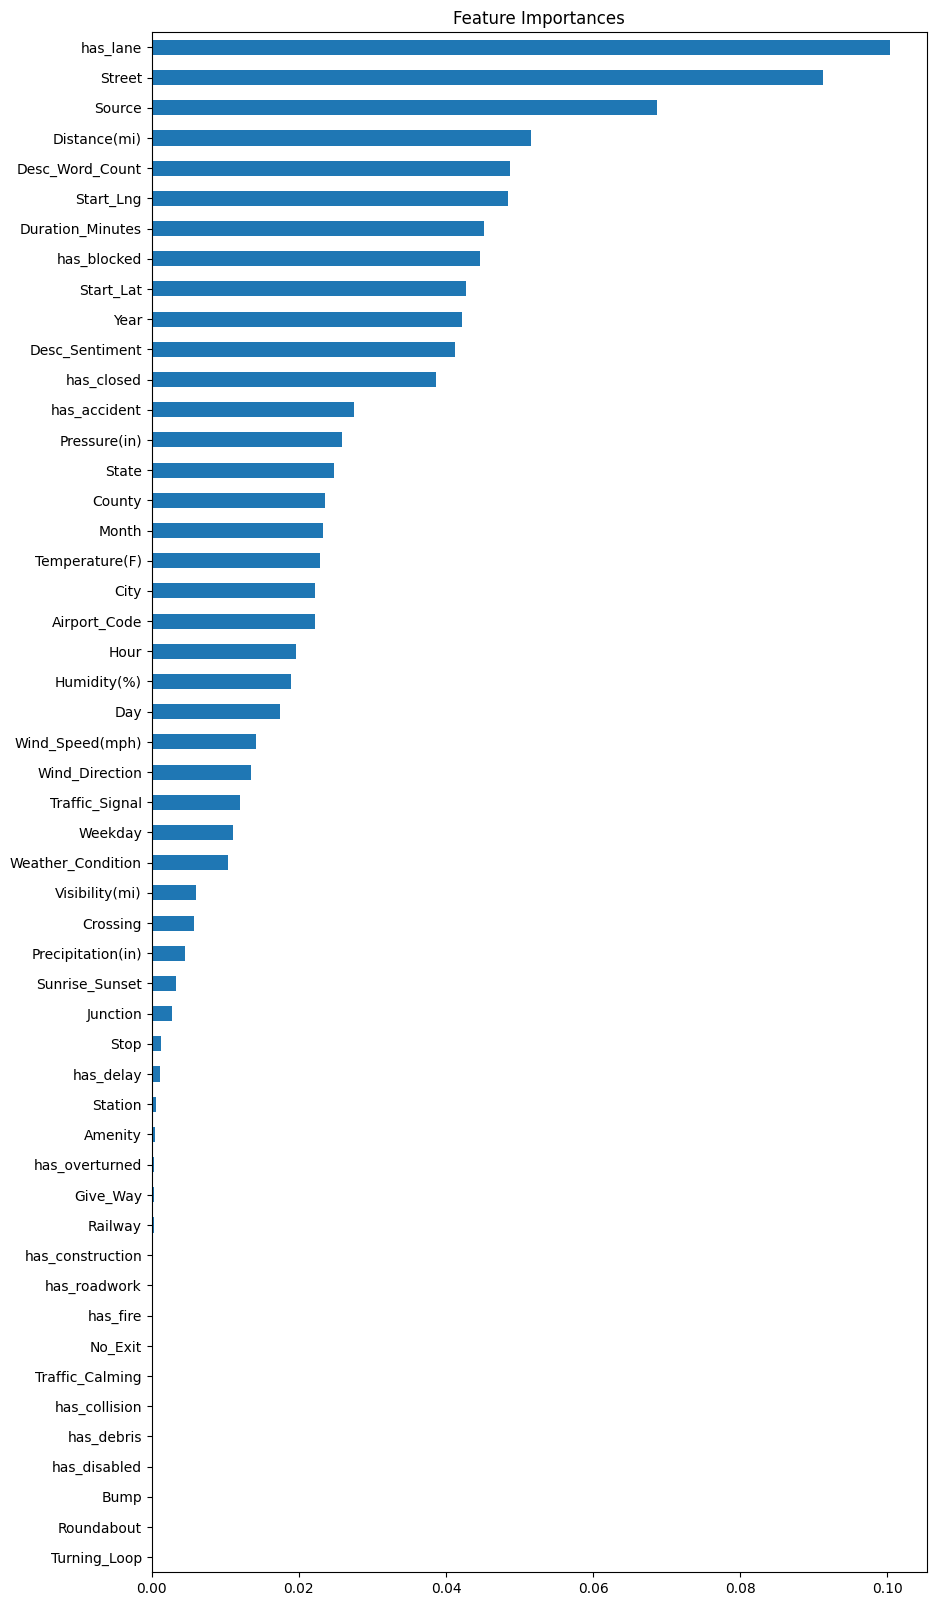

In [ ]:
import matplotlib.pyplot as plt

importances = rf.feature_importances_
importances_sorted.plot(kind='barh', figsize=(40, 20))
plt.title("Feature Importances")
plt.gca().invert_yaxis()  # Highest on top
plt.show()


In [ ]:
# Removing low feature important columns
df_dropped = df_dropped.drop(columns=['Traffic_Calming', 'Bump', 'Roundabout', 'Turning_Loop'])

#Columns we maybe shouldn't have removed Source, Duration_Minutes, Airport_Code

## Other

In [ ]:
# After extracting time values, we drop Start_Time
df_dropped = df_dropped.drop(columns=['Start_Time'])

Street is too specific, and it may affect negatively out model, so we drop the column

In [ ]:
df_dropped = df_dropped.drop(columns=['Street'])

In [ ]:
# Weather_Timestamp is when the weather data was captured, it's almost the same as Start_Time
df_dropped = df_dropped.drop(columns=['Weather_Timestamp'])

In [ ]:
df_dropped.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7728394 entries, 0 to 7728393
Data columns (total 48 columns):
 #   Column             Dtype  
---  ------             -----  
 0   Source             object 
 1   Severity           int64  
 2   Start_Lat          float64
 3   Start_Lng          float64
 4   Distance(mi)       float64
 5   Description        object 
 6   City               object 
 7   County             object 
 8   State              object 
 9   Airport_Code       object 
 10  Temperature(F)     float64
 11  Humidity(%)        float64
 12  Pressure(in)       float64
 13  Visibility(mi)     float64
 14  Wind_Direction     object 
 15  Wind_Speed(mph)    float64
 16  Precipitation(in)  float64
 17  Weather_Condition  object 
 18  Amenity            bool   
 19  Crossing           bool   
 20  Give_Way           bool   
 21  Junction           bool   
 22  No_Exit            bool   
 23  Railway            bool   
 24  Station            bool   
 25  Stop              

# Handling missing data

In [ ]:
df_dropped.columns

Index(['Source', 'Severity', 'Start_Lat', 'Start_Lng', 'Distance(mi)',
       'Description', 'City', 'County', 'State', 'Airport_Code',
       'Temperature(F)', 'Humidity(%)', 'Pressure(in)', 'Visibility(mi)',
       'Wind_Direction', 'Wind_Speed(mph)', 'Precipitation(in)',
       'Weather_Condition', 'Amenity', 'Crossing', 'Give_Way', 'Junction',
       'No_Exit', 'Railway', 'Station', 'Stop', 'Traffic_Signal',
       'Sunrise_Sunset', 'Hour', 'Day', 'Month', 'Year', 'Weekday',
       'Duration_Minutes', 'Desc_Word_Count', 'Desc_Sentiment', 'has_accident',
       'has_blocked', 'has_delay', 'has_construction', 'has_closed',
       'has_fire', 'has_collision', 'has_overturned', 'has_disabled',
       'has_lane', 'has_roadwork', 'has_debris'],
      dtype='object')

In [ ]:
df_dropped.isnull().sum()

,0
Source,0
Severity,0
Start_Lat,0
Start_Lng,0
Distance(mi),0
Description,0
City,253
County,0
State,0
Airport_Code,22635


City has few missing lines, we may drop them

In [ ]:
df_dropped.dropna(subset=['City'], inplace=True)

In [ ]:
df_dropped['Description'] = df_dropped['Description'].fillna("NOT PROVIDED")

Precipitation is 0 if not provided (null) as described on the dataset on kaggle

In [ ]:
df_dropped['Precipitation(in)'] = df_dropped['Precipitation(in)'].fillna(0)

In [ ]:
def fill_sunrise_sunset(row):
    if pd.isna(row['Sunrise_Sunset']):
        if 6 <= row['Hour'] < 18:
            return 'Day'
        else:
            return 'Night'
    else:
        return row['Sunrise_Sunset']

df_dropped['Sunrise_Sunset'] = df_dropped.apply(fill_sunrise_sunset, axis=1)

In [ ]:
df_dropped.isnull().sum()

,0
Source,0
Severity,0
Start_Lat,0
Start_Lng,0
Distance(mi),0
Description,0
City,0
County,0
State,0
Airport_Code,22633


## Weather values

In [ ]:
import pandas as pd
df_dropped = df_dropped.reset_index()


def fill_weather(df_dropped, weather_var):
    # Ensure index is reset
    df_dropped = df_dropped.reset_index(drop=True)

    # Create non-null and null subsets
    df_non_na = df_dropped[df_dropped[weather_var].notna()]
    df_na = df_dropped[df_dropped[weather_var].isna()].copy()

    # Merge to get fill values
    merged = df_na.merge(
        df_non_na[['City', 'Year', 'Month', 'Day', weather_var]],
        on=['City', 'Year', 'Month', 'Day'],
        how='left',
        suffixes=('', '_filled')
    )

    # Drop duplicates (keep first) based on matching keys
    merged = merged.drop_duplicates(
        subset=['City', 'Year', 'Month', 'Day'],
        keep='first'
    )

    # Create new merged subset with fill values
    filled = df_dropped[df_dropped[weather_var].isna()].merge(
        merged[['City', 'Year', 'Month', 'Day', f'{weather_var}_filled']],
        on=['City', 'Year', 'Month', 'Day'],
        how='left'
    )

    # Fill the missing values back into the original dataframe
    df_dropped.loc[df_dropped[weather_var].isna(), weather_var] = filled[f'{weather_var}_filled']

    return df_dropped

In [ ]:
df_dropped = fill_weather(df_dropped, 'Temperature(F)')
df_dropped = fill_weather(df_dropped, 'Humidity(%)')
df_dropped = fill_weather(df_dropped, 'Pressure(in)')
df_dropped = fill_weather(df_dropped, 'Visibility(mi)')
df_dropped = fill_weather(df_dropped, 'Wind_Direction')
df_dropped = fill_weather(df_dropped, 'Wind_Speed(mph)')
df_dropped = fill_weather(df_dropped, 'Weather_Condition')
df_dropped = fill_weather(df_dropped, 'Airport_Code')

In [ ]:
df_dropped.isna().sum()

,0
index,0
Source,0
Severity,0
Start_Lat,0
Start_Lng,0
Distance(mi),0
Description,0
City,0
County,0
State,0


In [ ]:
df_dropped.dropna(subset=['Temperature(F)', 'Humidity(%)','Pressure(in)','Visibility(mi)','Wind_Direction','Wind_Speed(mph)','Weather_Condition'], inplace=True)
df_dropped = df_dropped.drop(columns=['index'])

In [ ]:
df_dropped

,Source,Severity,Start_Lat,Start_Lng,Distance(mi),Description,City,County,State,Airport_Code,Temperature(F),Humidity(%),Pressure(in),Visibility(mi),Wind_Direction,Wind_Speed(mph),Precipitation(in),Weather_Condition,Amenity,Crossing,Give_Way,Junction,No_Exit,Railway,Station,Stop,Traffic_Signal,Sunrise_Sunset,Hour,Day,Month,Year,Weekday,Duration_Minutes,Desc_Word_Count,Desc_Sentiment,has_accident,has_blocked,has_delay,has_construction,has_closed,has_fire,has_collision,has_overturned,has_disabled,has_lane,has_roadwork,has_debris
0,Source2,3,39.865147,-84.058723,0.010,Right lane blocked due to accident on I-70 Eas...,Dayton,Montgomery,OH,KFFO,36.9,91.0,29.68,10.0,CALM,4.6,0.02,Light Rain,False,False,False,False,False,False,False,False,False,Night,5,8,2,2016,Monday,314.000000,16,0.080357,1,1,0,0,0,0,0,0,0,1,0,0
1,Source2,2,39.928059,-82.831184,0.010,Accident on Brice Rd at Tussing Rd. Expect del...,Reynoldsburg,Franklin,OH,KCMH,37.9,100.0,29.65,10.0,CALM,4.6,0.00,Light Rain,False,False,False,False,False,False,False,False,False,Night,6,8,2,2016,Monday,30.000000,9,0.000000,1,0,1,0,0,0,0,0,0,0,0,0
2,Source2,2,39.063148,-84.032608,0.010,Accident on OH-32 State Route 32 Westbound at ...,Williamsburg,Clermont,OH,KI69,36.0,100.0,29.67,10.0,SW,3.5,0.00,Overcast,False,False,False,False,False,False,False,False,True,Night,6,8,2,2016,Monday,30.000000,13,0.000000,1,0,1,0,0,0,0,0,0,0,0,0
3,Source2,3,39.747753,-84.205582,0.010,Accident on I-75 Southbound at Exits 52 52B US...,Dayton,Montgomery,OH,KDAY,35.1,96.0,29.64,9.0,SW,4.6,0.00,Mostly Cloudy,False,False,False,False,False,False,False,False,False,Night,7,8,2,2016,Monday,30.000000,11,0.000000,1,0,1,0,0,0,0,0,0,0,0,0
4,Source2,2,39.627781,-84.188354,0.010,Accident on McEwen Rd at OH-725 Miamisburg Cen...,Dayton,Montgomery,OH,KMGY,36.0,89.0,29.65,6.0,SW,3.5,0.00,Mostly Cloudy,False,False,False,False,False,False,False,False,True,Day,7,8,2,2016,Monday,30.000000,11,0.000000,1,0,1,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7728136,Source1,2,34.002480,-117.379360,0.543,At Market St - Accident.,Riverside,Riverside,CA,KRAL,86.0,40.0,28.92,10.0,W,13.0,0.00,Fair,False,False,False,False,False,False,False,False,False,Day,18,23,8,2019,Friday,28.600000,5,0.000000,1,0,0,0,0,0,0,0,0,0,0,0
7728137,Source1,2,32.766960,-117.148060,0.338,At Camino Del Rio/Mission Center Rd - Accident.,San Diego,San Diego,CA,KMYF,70.0,73.0,29.39,10.0,SW,6.0,0.00,Fair,False,False,False,False,False,False,False,False,False,Day,19,23,8,2019,Friday,26.883333,8,-0.100000,1,0,0,0,0,0,0,0,0,0,0,0
7728138,Source1,2,33.775450,-117.847790,0.561,At Glassell St/Grand Ave - Accident. in the ri...,Orange,Orange,CA,KSNA,73.0,64.0,29.74,10.0,SSW,10.0,0.00,Partly Cloudy,False,False,False,True,False,False,False,False,False,Day,19,23,8,2019,Friday,28.466667,10,0.285714,1,0,0,0,0,0,0,0,0,1,0,0
7728139,Source1,2,33.992460,-118.403020,0.772,At CA-90/Marina Fwy/Jefferson Blvd - Accident.,Culver City,Los Angeles,CA,KSMO,71.0,81.0,29.62,10.0,SW,8.0,0.00,Fair,False,False,False,False,False,False,False,False,False,Day,19,23,8,2019,Friday,29.350000,6,0.000000,1,0,0,0,0,0,0,0,0,0,0,0


In [ ]:
df_dropped.isna().sum()

,0
Source,0
Severity,0
Start_Lat,0
Start_Lng,0
Distance(mi),0
Description,0
City,0
County,0
State,0
Airport_Code,0


In [ ]:
df_dropped.info()

<class 'pandas.core.frame.DataFrame'>
Index: 7128752 entries, 0 to 7728140
Data columns (total 48 columns):
 #   Column             Dtype  
---  ------             -----  
 0   Source             object 
 1   Severity           int64  
 2   Start_Lat          float64
 3   Start_Lng          float64
 4   Distance(mi)       float64
 5   Description        object 
 6   City               object 
 7   County             object 
 8   State              object 
 9   Airport_Code       object 
 10  Temperature(F)     float64
 11  Humidity(%)        float64
 12  Pressure(in)       float64
 13  Visibility(mi)     float64
 14  Wind_Direction     object 
 15  Wind_Speed(mph)    float64
 16  Precipitation(in)  float64
 17  Weather_Condition  object 
 18  Amenity            bool   
 19  Crossing           bool   
 20  Give_Way           bool   
 21  Junction           bool   
 22  No_Exit            bool   
 23  Railway            bool   
 24  Station            bool   
 25  Stop               bool

# Encoding

We need to transform categorical data to numerical, we will use label encoding for all categories with few unique values. **For other categories we will do an experiment.**

In [ ]:
df['Source'].nunique()

3

In [ ]:
df['City'].nunique()

13678

In [ ]:
df['County'].nunique()

1871

In [ ]:
df['State'].nunique()

49

In [ ]:
df['Airport_Code'].nunique()

2045

In [ ]:
df['Wind_Direction'].nunique()

18

In [ ]:
df['Weather_Condition'].nunique()

144

In [ ]:
df['Sunrise_Sunset'].nunique()

2

In [ ]:
df['Weekday'].nunique()

7

In [ ]:
from sklearn.preprocessing import LabelEncoder

# Those are the labels with low unique values
labels = ['Source', 'Wind_Direction', 'Sunrise_Sunset', 'Weekday']

# Label encode labels
le = LabelEncoder()
for label in labels:
    df_dropped[label] = le.fit_transform(df_dropped[label])

In [ ]:
df_dropped.info()

<class 'pandas.core.frame.DataFrame'>
Index: 7128752 entries, 0 to 7728140
Data columns (total 48 columns):
 #   Column             Dtype  
---  ------             -----  
 0   Source             int64  
 1   Severity           int64  
 2   Start_Lat          float64
 3   Start_Lng          float64
 4   Distance(mi)       float64
 5   Description        object 
 6   City               object 
 7   County             object 
 8   State              object 
 9   Airport_Code       object 
 10  Temperature(F)     float64
 11  Humidity(%)        float64
 12  Pressure(in)       float64
 13  Visibility(mi)     float64
 14  Wind_Direction     int64  
 15  Wind_Speed(mph)    float64
 16  Precipitation(in)  float64
 17  Weather_Condition  object 
 18  Amenity            bool   
 19  Crossing           bool   
 20  Give_Way           bool   
 21  Junction           bool   
 22  No_Exit            bool   
 23  Railway            bool   
 24  Station            bool   
 25  Stop               bool

# Exporting dataset

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import zipfile
import os

# Step 1: Save the CSV file temporarily
csv_path = '/content/df_dropped_4.csv'
df_dropped.to_csv(csv_path, index=False)

# Step 2: Zip the CSV file
zip_path = '/content/drive/MyDrive/M2/ML_project/df_dropped_4.zip'
with zipfile.ZipFile(zip_path, 'w', zipfile.ZIP_DEFLATED) as zipf:
    zipf.write(csv_path, os.path.basename(csv_path))

# Confirm the file has been zipped and saved
print("CSV file has been zipped and saved to Google Drive!")

CSV file has been zipped and saved to Google Drive!


In [ ]:
sns.scatterplot( x = df.Start_Lng , y = df.Start_Lat, size = 0.001  ,alpha = 0.5 ,color= 'purple')

import folium
from folium.plugins import HeatMap
lat_lng_pairs = zip( list(df.Start_Lat[:150]) , list(df.Start_Lng[:150]) )
map_ = folium.Map()
HeatMap(lat_lng_pairs).add_to(map_)
map_